# Task 1: Human Agent

## Overview
The Magic Star Puzzle entails arranging the numbers from 1 to 12 on a star-shaped grid, ensuring that the sum of the numbers on each of the six lines equals 26. Additionally, a specific constraint requires that the sum of the numbers at the outer vertices must also equal 26. 
![Assignment and Lines ](Assignment.jpg) 

### Rules and Constraints
- **Numbers**: You must arrange the integers from 1 to 12 within the star.
- **Sum Condition**: Every line of four numbers (whether rows, columns, or diagonals) must sum to 26,and the same applies for the outer vertices.
- **Lines**: There are 6 lines in total, and all must satisfy the sum condition.

The challenge is to discover the valid number arrangements that satisfy these conditions.

---

## Approaches I Attempted

1. **Observation on Vertex Sums**:
    - One effective method was to start by focusing on the outer vertices, ensuring their sum equaled 26. From there, I moved to the internal nodes, adjusting the placements to balance the sums across the lines.
2. **Diamond Sums**:
    - Another approach involved leveraging the diamond sum observation. By recognizing that certain diamond-shaped clusters must sum to 26, I could limit the number of valid placements for internal nodes. However, focusing only on these diamonds often led to partial solutions that failed the line sum constraint, requiring further adjustments.

3. **Geometric Symmetry**:
    - The puzzle’s star shape exhibits symmetry, particularly in its two main triangles—one upright and one inverted. This symmetry suggests that the numbers placed within these triangles are likely to have a balanced distribution, with their sums contributing equally to the overall solution. Exploiting this symmetry helps in placing numbers systematically, as it provides a natural structure to guide the placement process.

4. **Algorithmic Considerations**:
    - Each of the 12 numbers must be placed exactly once on the grid, meaning no number is repeated. Moreover, every number participates in exactly two lines, adding a layer of complexity. Ensuring that each line sums to 26 while using each number only once requires careful planning, as changing the placement of one number can affect multiple lines.
  

##### Strategies:

- From my observations, there are several approaches to solving the puzzle, and a successful manual solution often requires the combination of at least two strategies. It is important to remember that while patterns may exist, they can lead to incorrect solutions. For example, I found that attempting to apply the diamond sum without considering the constraint of each line's total resulted in erroneous states.When focusing only on the diamonds, the outer vertex sums are neglected, leading to configurations that may work within the diamonds but fail when considering the sum of outer lines. For example, it is possible to satisfy the sum condition within a diamond, only to realize that the placement of those same numbers makes it impossible to satisfy the 26-sum condition in the lines that involve the outer vertices.
-  Therefore an optimal approach that could be considered is to combine the method for outer vertices summing to 26 and the diamonds also summing to 26, that proved effective upon discovering manually the 6 solutions.
- Additionally, the prominent pattern of the diamond sum equaling 26, along with ensuring that each number appears twice across two lines, is significant. Another factor to consider is that when the grid states are entirely empty—similar to playing the game GO—it becomes considerably more challenging to compute a solution compared to scenarios where several numbers are already placed.
---

#####  The solutions I observed upon putting the contraints
By representing each position in the grid with letters **A, B, C, D, E, F, G, H, I, J, K, L**, the following solutions were discovered, for the outer vertices.

1. **A: 1, B: 4, C: 10, D: 5, E: 7**  
   F: 12, G: 11, H: 3, I: 8, J: 6, K: 9, L: 2

2. **A: 1, B: 3, C: 9, D: 6, E: 8**  
   F: 11, G: 12, H: 5, I: 10, J: 4, K: 7, L: 2

3. **A: 1, B: 4, C: 12, D: 7, E: 3**  
   F: 11, G: 8, H: 2, I: 5, J: 9, K: 10, L: 6

4. **A: 1, B: 3, C: 11, D: 8, E: 4**  
   F: 12, G: 7, H: 2, I: 5, J: 9, K: 10, L: 6

5. **A: 1, B: 2, C: 12, D: 9, E: 3**  
   F: 6, G: 11, H: 7, I: 10, J: 4, K: 5, L: 8

6. **A: 1, B: 2, C: 10, D: 9, E: 5**  
   F: 7, G: 12, H: 8, I: 11, J: 3, K: 4, L: 6

---

##### Visual Representations

![Outer Vertices ](Outer.png) 

![Three Diamonds ](Diamond.png) 







### Task 2: Computing Agent

In this task, we first import the AIMA library and create an instance of the class for search problems, which represents our problem at hand.

#### Code Explanation

The **AIMA-Python** class `Problem` contains five functions:

1. **`__init__`**: 
   - This constructor initializes the puzzle's initial state, hard-coded goal state, the required sum for each line, and the various configurations (lines, diamonds, triangles,nodes of the star,and position configurations).

2. **`actions`**: 
   - This method identifies empty positions in the current state and generates possible actions by pairing these positions with the missing values (from 1 to 12).

3. **`result`**: 
   - This method generates a new state by placing a value in an empty position based on the chosen action.

4. **`is_goal`**: 
   - This method checks if the current state is the goal state, specifically that all lines sum to 26, and that each node of the star sums to 26.

5. **Heuristic Functions**:
   - There are multiple heuristic functions (`h1`, `h2`, `h3`, and `h4`) that evaluate the current state relative to the goal state:
     - **`h1`**: Sum of differences for each line.
     - **`h2`**: Checks if diamond sums equal 26.
     - **`h3`**: Sums for outer vertices.
     - **`h4`**: Ensures triangles have equal sums.
     - **`h5`**: Computes the hamming distance, normally it is supposed to fill missed tiles, however in this case it just shows that the lines do not add up to 26,as our puzzle is different than the 8-puzzle problem.
  
   - The combined heuristic `h` integrates all the first 4 heurisitcs in one, with different priorities(weights). To be more precise, h3 has the biggest priority, given our second condition of the outer vertices summing to 26.



In [1]:
from aima_search import *

class HexagramPuzzle(Problem):
    def __init__(self, initial, goal=(4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 6, 10)):
        """
        :param initial: Initial state of the puzzle (tuple of 12 integers)
        :param goal: Goal state of the puzzle (By default it is a solved state)
        """
        self.initial, self.goal = initial, goal
        self.goal_sum = 26  # The sum that each line should equal in the solved state
        
        # Define the lines of the hexagram
        self.lines = [
            ('b', 'c', 'd', 'e'),  # Upper horizontal line 
            ('a', 'c', 'f', 'h'),  # Upper triangle left line 
            ('a', 'd', 'g', 'k'),  # Upper triangle right line 
            ('b', 'f', 'i', 'l'),  # Lower horizontal line 
            ('h', 'i', 'j', 'k'),  # Inverted triangle left line 
            ('e', 'g', 'j', 'l')   # Inverted triangle right line 
        ]
        
        # Define the diamonds within the hexagram
        self.diamonds = [
            ('a', 'f', 'g', 'l'),
            ('b', 'i', 'd', 'k'),
            ('e', 'c', 'j', 'h')
        ]
        
        # Define the two big triangles (upper and inverted)
        self.triangles = [
            ('a','h','k'),  # Upper triangle
            ('b','e','l')   # Inverted triangle
        ]
        
        # Define the outer vertices of the star
        self.outer_vertices = ('a', 'b', 'e', 'h', 'k', 'l')
        
        # Map positions to indices in the state tuple
        self.positions = {
            'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5,
            'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11
        }
        
        super().__init__(tuple(initial))

    def actions(self, state):
        """
        Return the list of valid actions (numbers that can be placed) in the current state.
        
        :param state: Current state of the puzzle
        :return: List of valid numbers that can be placed
        """
        return [i for i in range(1, 13) if i not in state]

    def result(self, state, action):
        """
        Apply an action to the state and return the new state.
        
        :param state: Current state of the puzzle
        :param action: Number to be placed in the puzzle
        :return: New state after applying the action
        """
        new_state = list(state)
        blank = new_state.index(0)
        new_state[blank] = action
        return tuple(new_state)

    def is_goal(self, state):
        """
        Check if the current state is the goal state.
        
        :param state: Current state of the puzzle
        :return: True if the state is the goal state, False otherwise
        """
        # Check if all lines sum to the goal sum
        for line in self.lines:
            if sum(state[self.positions[pos]] for pos in line) != self.goal_sum:
                return False
        
        # Check if the outer vertices sum to the goal sum
        if sum(state[self.positions[pos]] for pos in self.outer_vertices) != self.goal_sum:
            return False
        
        return True 

    def h1(self, node):
        """
        Sum of differences between goal sum and actual sum for each line.
        
        :param node: Current node in the search tree
        :return: Heuristic value
        """
        state = node.state
        return sum(abs(self.goal_sum - sum(state[self.positions[pos]] for pos in line if state[self.positions[pos]] != 0))
                   for line in self.lines)

    def h2(self, node):
        """
         Sum of differences between goal sum and actual sum for each diamond.
        
        :param node: Current node in the search tree
        :return: Heuristic value
        """
        state = node.state
        return sum(abs(self.goal_sum - sum(state[self.positions[pos]] for pos in diamond if state[self.positions[pos]] != 0))
                   for diamond in self.diamonds)

    def h3(self, node):
        """
         Difference between goal sum and sum of outer vertices.
        
        :param node: Current node in the search tree
        :return: Heuristic value
        """
        state = node.state
        outer_sum = sum(state[self.positions[pos]] for pos in self.outer_vertices if state[self.positions[pos]] != 0)
        return abs(26 - outer_sum)

    def h4(self, node):
        """
         Difference between sums of the two big triangles.
        
        :param node: Current node in the search tree
        :return: Heuristic value
        """
        state = node.state
        triangle_sums = [sum(state[self.positions[pos]] for pos in triangle if state[self.positions[pos]] != 0) 
                         for triangle in self.triangles]
        return abs(triangle_sums[0] - triangle_sums[1])

    def hamming_distance(self, state):
  
     hamming = 0
     for line in self.lines:
        line_sum = sum(state[self.positions[pos]] for pos in line if state[self.positions[pos]] != 0)
          # If the sum of the line does not match the goal sum, increment the hamming counter
        if line_sum != self.goal_sum:
            hamming += 1
     # Return the total count of lines that do not match the goal sum
     return hamming
    def h5(self, node):
  
     return self.hamming_distance(node.state)

    def h(self, node):
        """
        Combined heuristic function: Weighted sum of the first 4  heuristics with added weights.
        
        :param node: Current node in the search tree
        :return: Combined heuristic value
        """
        return (0.2 * self.h1(node) + 0.4 * self.h2(node) + 0.4 * self.h3(node) + 
                self.h4(node))

In [2]:

def ascii_print(state):
    def format_num(n):
        return f"{n:2d}" if n != 0 else "__"

    s = [format_num(n) for n in state]  # Format each number for display
    space = " "  # Single space for better formatting

    # Printing the hexagram structure
    print(f"{space*4}{s[0]}{space*4}")          # Position a
    print(f"{space*3}/{space}\\{space*3}")     
    print(f"{s[1]}-{s[2]}-{s[3]}-{s[4]}")      # Positions b, c, d, e
    print(f"{space}\\{space}/{space}\\{space}/") 
    print(f"{space*2}{s[5]}{space*3}{s[6]}")    # Positions f and g
    print(f"{space*2}/ {space}\\{space}/")    
    print(f"{s[7]}-{s[8]}-{s[9]}-{s[10]}")     # Positions h, i, j, k
    print(f"{space*4}\\/")                   
    print(f"{space*3}{s[11]}")                   # Position l
    print()

    

##### Task 3
- In Task 3, we selected three uniform search algorithms to test—Breadth-First Search (BFS), Depth-First Search (DFS), and Uniform Cost Search (UCS)—on a set of test cases. Using ASCII representations of the star puzzle, we can visually depict each algorithm's progress as it explores the search space, and evaluate whether it successfully reaches the goal state in each instance.

* BFS

In [3]:
#empty = HexagramPuzzle((0,0,0,0,0,10,0,0,0,0,0,0)) # fully empty (run at your own risk)
fully_completed = HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 6, 10)) 
e1= HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 0,0))  # 2 elements missing
e2 = HexagramPuzzle((1, 4, 10, 5, 7, 12, 11, 3, 8, 0, 0, 0)  )  # 3 element missing
e3 = HexagramPuzzle((1, 3, 9, 6, 8, 11, 0, 0, 0, 0, 0, 0))  # 6 elements missing
e4 = HexagramPuzzle((1, 2, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0)) # 9 elements missing 
e5 = HexagramPuzzle((1,2,0,0,0,0,0,0,0,0,0,0))  # 10 elements missing
print(breadth_first_search(e1))
print(path_states(breadth_first_search(e1)))
for s in path_states(breadth_first_search(e1)):
    ascii_print(s)


<(4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 6, 10)>
[(4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 0, 0), (4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 6, 0), (4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 6, 10)]
     4    
   / \   
 1-12-11- 2
 \ / \ /
   7    5
  /  \ /
 3- 8- 9-__
    \/
   __

     4    
   / \   
 1-12-11- 2
 \ / \ /
   7    5
  /  \ /
 3- 8- 9- 6
    \/
   __

     4    
   / \   
 1-12-11- 2
 \ / \ /
   7    5
  /  \ /
 3- 8- 9- 6
    \/
   10



* DFS

In [4]:

#empty = HexagramPuzzle((0,0,0,0,0,10,0,0,0,0,0,0)) # fully empty (run at your own risk)
fully_completed = HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 6, 10)) 
e1= HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 0,0))  # 2 elements missing
e2 = HexagramPuzzle((1, 4, 10, 5, 7, 12, 11, 3, 8, 0, 0, 0)  )  # 3 element missing
e3 = HexagramPuzzle((1, 3, 9, 6, 8, 11, 0, 0, 0, 0, 0, 0))  # 6 elements missing
e4 = HexagramPuzzle((1, 2, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0)) # 9 elements missing 
e5 = HexagramPuzzle((1,2,0,0,0,0,0,0,0,0,0,0))  # 10 elements missing


print(depth_first_bfs(e3))
print(path_states(depth_first_bfs(e3)))
for s in path_states(depth_first_bfs(e3)):
    ascii_print(s)

<(1, 3, 9, 6, 8, 11, 12, 5, 10, 4, 7, 2)>
[(1, 3, 9, 6, 8, 11, 0, 0, 0, 0, 0, 0), (1, 3, 9, 6, 8, 11, 12, 0, 0, 0, 0, 0), (1, 3, 9, 6, 8, 11, 12, 5, 0, 0, 0, 0), (1, 3, 9, 6, 8, 11, 12, 5, 10, 0, 0, 0), (1, 3, 9, 6, 8, 11, 12, 5, 10, 4, 0, 0), (1, 3, 9, 6, 8, 11, 12, 5, 10, 4, 7, 0), (1, 3, 9, 6, 8, 11, 12, 5, 10, 4, 7, 2)]
     1    
   / \   
 3- 9- 6- 8
 \ / \ /
  11   __
  /  \ /
__-__-__-__
    \/
   __

     1    
   / \   
 3- 9- 6- 8
 \ / \ /
  11   12
  /  \ /
__-__-__-__
    \/
   __

     1    
   / \   
 3- 9- 6- 8
 \ / \ /
  11   12
  /  \ /
 5-__-__-__
    \/
   __

     1    
   / \   
 3- 9- 6- 8
 \ / \ /
  11   12
  /  \ /
 5-10-__-__
    \/
   __

     1    
   / \   
 3- 9- 6- 8
 \ / \ /
  11   12
  /  \ /
 5-10- 4-__
    \/
   __

     1    
   / \   
 3- 9- 6- 8
 \ / \ /
  11   12
  /  \ /
 5-10- 4- 7
    \/
   __

     1    
   / \   
 3- 9- 6- 8
 \ / \ /
  11   12
  /  \ /
 5-10- 4- 7
    \/
    2



UCS

In [5]:
#empty = HexagramPuzzle((0,0,0,0,0,10,0,0,0,0,0,0)) # fully empty (run at your own risk)
fully_completed = HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 6, 10)) 
e1= HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 0,0))  # 2 elements missing
e2 = HexagramPuzzle((1, 4, 10, 5, 7, 12, 11, 3, 8, 0, 0, 0)  )  # 3 element missing
e3 = HexagramPuzzle((1, 3, 9, 6, 8, 11, 0, 0, 0, 0, 0, 0))  # 6 elements missing
e4 = HexagramPuzzle((1, 2, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0)) # 9 elements missing 
e5 = HexagramPuzzle((1,2,0,0,0,0,0,0,0,0,0,0))  # 10 elements missing




print(uniform_cost_search(e1))
print(path_states(uniform_cost_search(e1)))
for s in path_states(uniform_cost_search(e1)):
    ascii_print(s)

<(4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 6, 10)>
[(4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 0, 0), (4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 6, 0), (4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 6, 10)]
     4    
   / \   
 1-12-11- 2
 \ / \ /
   7    5
  /  \ /
 3- 8- 9-__
    \/
   __

     4    
   / \   
 1-12-11- 2
 \ / \ /
   7    5
  /  \ /
 3- 8- 9- 6
    \/
   __

     4    
   / \   
 1-12-11- 2
 \ / \ /
   7    5
  /  \ /
 3- 8- 9- 6
    \/
   10



* Summary report on how all the three uniform search methods work regards to how many nodes they need to access to reach, do they reach the optimal state, how many actions they have to do. 
  

In [6]:
#empty = HexagramPuzzle((0,0,0,0,0,10,0,0,0,0,0,0)) # fully empty (run at your own risk)
fully_completed = HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 6, 10)) 
e1= HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 0,0))  # 2 elements missing
e2 = HexagramPuzzle((1, 4, 10, 5, 7, 12, 11, 3, 8, 0, 0, 0)  )  # 3 element missing
e3 = HexagramPuzzle((1, 3, 9, 6, 8, 11, 0, 0, 0, 0, 0, 0))  # 6 elements missing
e4 = HexagramPuzzle((1, 2, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0)) # 9 elements missing 
e5 = HexagramPuzzle((1,2,0,0,0,0,0,0,0,0,0,0))  # 10 elements missing

test_puzzles = [fully_completed,e1,e2,e3,e4,e5]

search_algorithms = [
    breadth_first_search, 
    depth_first_bfs,
    uniform_cost_search
]



# Generate report
report(search_algorithms, test_puzzles)


breadth_first_search:
        0 nodes |        1 goal |    0 cost |       0 actions | HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3
        3 nodes |        4 goal |    2 cost |       4 actions | HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3
       13 nodes |       14 goal |    3 cost |      11 actions | HexagramPuzzle((1, 4, 10, 5, 7, 12, 11, 
    1,906 nodes |    1,907 goal |    6 cost |   1,193 actions | HexagramPuzzle((1, 3, 9, 6, 8, 11, 0, 0,
  867,556 nodes |  867,557 goal |    9 cost | 504,686 actions | HexagramPuzzle((1, 2, 12, 0, 0, 0, 0, 0,
9,030,311 nodes |9,030,312 goal |   10 cost |5,401,522 actions | HexagramPuzzle((1, 2, 0, 0, 0, 0, 0, 0, 
9,899,789 nodes |9,899,795 goal |   30 cost |5,907,416 actions | TOTAL

depth_first_bfs:
        0 nodes |        1 goal |    0 cost |       0 actions | HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3
        3 nodes |        3 goal |    2 cost |       4 actions | HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3
       11 nodes |       11 goal |    3 cost |   

##### Task 3 Manual method vs Uniform Search Method
 In the summary report, it is evident that all three methods achieved optimal solutions. My manual approach had both advantages and disadvantages. On the positive side, I was able to modify goal states effectively and generate human-based heuristics, allowing for a tailored approach to the problem. This included identifying geometrical properties and patterns, which aided in a deeper understanding of the problem structure. 


 Such insights can lead to quicker solutions, especially when fewer states need exploration. However, this manual method is often time-consuming and can be prone to errors, especially when we deal with empty puzzles. In comparison, Breadth-First Search  is known for finding optimal solutions efficiently, frequently exploring fewer nodes in the process. 
 
 For instance, in the Hexagram Puzzle results, BFS explored a total of 9,899,789 nodes to reach a solution with a cost of 30. In contrast, Uniform Cost Search  also displayed its effectiveness, requiring 10,852,484 nodes for a solution with the same cost, but it was guaranteed to find the optimal path since it considers the cost of actions.
 
  The total nodes explored by UCS were significantly larger than those by BFS, indicating its less efficient exploration in this case. DFS, while it can be faster in the case due to its depth-oriented nature, does not guarantee optimality or completeness, particularly in cases where paths can loop or become excessively deep. Therefore, while my manual approach offers adaptability through pattern recognition, BFS stands out as a more efficient and less error-prone method for achieving optimal solutions in this context.

##### Task 4: Heuristics and A* Algorithm

There are 6 tested heuristics with the A* algorithm,the combined heuristics' output was observed first. Then, I summarized all the heuristics within the report function and observed how each heuristic compares against the uniform search algorithms, and which heuristic is admissible.

> An admissible heuristic is one which **NEVER** overestimates the cost of reaching the goal.

In my case, I developed six distinct heuristics for the Hexagram Puzzle. Three of these—line sum, diamonds, and triangles—were derived from careful manual observations of the puzzle's structure. The outer vertices heuristic was also created through this approach, focusing on key geometric elements.

For the hamming distance, I chose it because it tracks discrepancies between two configurations, making it a natural candidate for assessing the puzzle's current state against the goal. Given its ability to measure differences effectively, it was hypothesized to be particularly suitable for this problem.:

1. **h1 = h_linesum**: Admissible due to performing minimum corrections per line.
2. **h2 = h_diamonds**: Admissible in a similar fashion.
3. **h3 = outer vertices**: Admissible as it only considers a subset of the puzzle. It's better for a heuristic to underestimate than overestimate.
4. **h4 = h_trianglesum**: It could lead to overestimation because it focuses on the sum of values in the triangle-shaped sections rather than their actual proximity to the goal configuration.
5. **h5 = hamming distance**: Admissible as it provides a lower bound on the number of moves required.
6. **h_combined = h1 + h2 + h3 + h4**: A weighted sum of admissible heuristics,. If all component heuristics are indeed admissible, their weighted sum will also be admissible, given that the weights sum to 1 or less (which they do: 0.2 + 0.4 + 0.4 + 0  = 1 = 1). 

- In terms of the weights' choice, the main reason for that order was that the outer vertices were important to be included thus they are weighted heavily, the same goes for the diamonds summing to 26,the linesum heuristic was also with double priority. After observing potential overestimation from the h_trianglesum heuristic, it was decided to exclude it from the weighted sum for the final combined heuristic.



In [12]:
#testing A* star with the combined heuristic
#empty = HexagramPuzzle((0,0,0,0,0,10,0,0,0,0,0,0)) # fully empty (run at your own risk)
fully_completed = HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 6, 10)) 
e1= HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 0,0))  # 2 elements missing
e2 = HexagramPuzzle((1, 4, 10, 5, 7, 12, 11, 3, 8, 0, 0, 0)  )  # 3 element missing
e3 = HexagramPuzzle((1, 3, 9, 6, 8, 11, 0, 0, 0, 0, 0, 0))  # 6 elements missing
e4 = HexagramPuzzle((1, 2, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0)) # 9 elements missing 
e5 = HexagramPuzzle((1,2,0,0,0,0,0,0,0,0,0,0))  # 10 elements missing



print(path_states(astar_search(e4)))
for s in path_states(astar_search(e4)):
    ascii_print(s)


[(1, 2, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0), (1, 2, 12, 9, 0, 0, 0, 0, 0, 0, 0, 0), (1, 2, 12, 9, 3, 0, 0, 0, 0, 0, 0, 0), (1, 2, 12, 9, 3, 6, 0, 0, 0, 0, 0, 0), (1, 2, 12, 9, 3, 6, 11, 0, 0, 0, 0, 0), (1, 2, 12, 9, 3, 6, 11, 7, 0, 0, 0, 0), (1, 2, 12, 9, 3, 6, 11, 7, 10, 0, 0, 0), (1, 2, 12, 9, 3, 6, 11, 7, 10, 4, 0, 0), (1, 2, 12, 9, 3, 6, 11, 7, 10, 4, 5, 0), (1, 2, 12, 9, 3, 6, 11, 7, 10, 4, 5, 8)]
     1    
   / \   
 2-12-__-__
 \ / \ /
  __   __
  /  \ /
__-__-__-__
    \/
   __

     1    
   / \   
 2-12- 9-__
 \ / \ /
  __   __
  /  \ /
__-__-__-__
    \/
   __

     1    
   / \   
 2-12- 9- 3
 \ / \ /
  __   __
  /  \ /
__-__-__-__
    \/
   __

     1    
   / \   
 2-12- 9- 3
 \ / \ /
   6   __
  /  \ /
__-__-__-__
    \/
   __

     1    
   / \   
 2-12- 9- 3
 \ / \ /
   6   11
  /  \ /
__-__-__-__
    \/
   __

     1    
   / \   
 2-12- 9- 3
 \ / \ /
   6   11
  /  \ /
 7-__-__-__
    \/
   __

     1    
   / \   
 2-12- 9- 3
 \ / \ /
   6   11
  /  \ /
 7-10-__-__
    

In [2]:
# Define puzzles
fully_completed = HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 6, 10)) 
e1 = HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3, 8, 9, 0, 0))  # 2 elements missing
e2 = HexagramPuzzle((1, 4, 10, 5, 7, 12, 11, 3, 8, 0, 0, 0))  # 3 elements missing
e3 = HexagramPuzzle((1, 3, 9, 6, 8, 11, 0, 0, 0, 0, 0, 0))  # 6 elements missing
e4 = HexagramPuzzle((1, 2, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0))  # 9 elements missing 
e5 = HexagramPuzzle((1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0))   # 10 elements missing

# Function for A* search with dynamic heuristic
def astar_with_heuristic(problem, heuristic):
    """
    A* search using the given heuristic function.
    `heuristic` is passed dynamically.
    """
    return astar_search(problem, heuristic)

# Dictionary of heuristic functions
heuristic_functions = {
    'h_linesum': lambda problem: astar_with_heuristic(problem, problem.h1),
    'h_diamond': lambda problem: astar_with_heuristic(problem, problem.h2),
    'h_outervertices': lambda problem: astar_with_heuristic(problem, problem.h3),
    'h_triangle': lambda problem: astar_with_heuristic(problem, problem.h4),
    'h_hamming': lambda problem: astar_with_heuristic(problem, problem.h5),
    'combined_h': lambda problem: astar_with_heuristic(problem, problem.h)
}


search_algorithms = [
    (breadth_first_search, "BFS"), 
    (depth_first_bfs, "DFS"),
    (uniform_cost_search, "UCS"),
] + [(h_func, name) for name, h_func in heuristic_functions.items()]

# Report function
test_puzzles = [fully_completed, e1, e2, e3, e4, e5] 
report(search_algorithms, test_puzzles)




BFS:
        0 nodes |        1 goal |    0 cost |       0 actions | HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3
        3 nodes |        4 goal |    2 cost |       4 actions | HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3
       13 nodes |       14 goal |    3 cost |      11 actions | HexagramPuzzle((1, 4, 10, 5, 7, 12, 11, 
    1,906 nodes |    1,907 goal |    6 cost |   1,193 actions | HexagramPuzzle((1, 3, 9, 6, 8, 11, 0, 0,
  867,556 nodes |  867,557 goal |    9 cost | 504,686 actions | HexagramPuzzle((1, 2, 12, 0, 0, 0, 0, 0,
9,030,311 nodes |9,030,312 goal |   10 cost |5,401,522 actions | HexagramPuzzle((1, 2, 0, 0, 0, 0, 0, 0, 
9,899,789 nodes |9,899,795 goal |   30 cost |5,907,416 actions | TOTAL

DFS:
        0 nodes |        1 goal |    0 cost |       0 actions | HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3
        3 nodes |        3 goal |    2 cost |       4 actions | HexagramPuzzle((4, 1, 12, 11, 2, 7, 5, 3
       11 nodes |       11 goal |    3 cost |      13 actions | HexagramPuzzl

BFS explored 9,899,789 nodes.
DFS explored 7,030,231 nodes.
UCS examined 10,852,484 nodes.
The combined_h heuristic explored 194,033 nodes.
The h_diamond heuristic explored 646,272 nodes.
The h_linesum heuristic explored 454,202 nodes.
The h_triangle heuristic explored 6,061,652 nodes.
The h_hamming heuristic explored 1,194,391 nodes.
The h_outervertices heuristic explored 1,401,860 nodes.

All methods maintained an optimal solution cost of 30, showcasing their ability to find efficient paths.
The heuristic-based approaches significantly reduced the search space compared to uninformed methods:
The combined_h heuristic explored 1.79% of UCS nodes.
The h_diamond heuristic explored 5.96% of UCS nodes.
The h_linesum heuristic explored 4.19% of UCS nodes.
The h_triangle heuristic explored 55.85% of UCS nodes.
The h_hamming heuristic explored 11.01% of UCS nodes.
The h_outervertices heuristic explored 12.92% of UCS nodes.


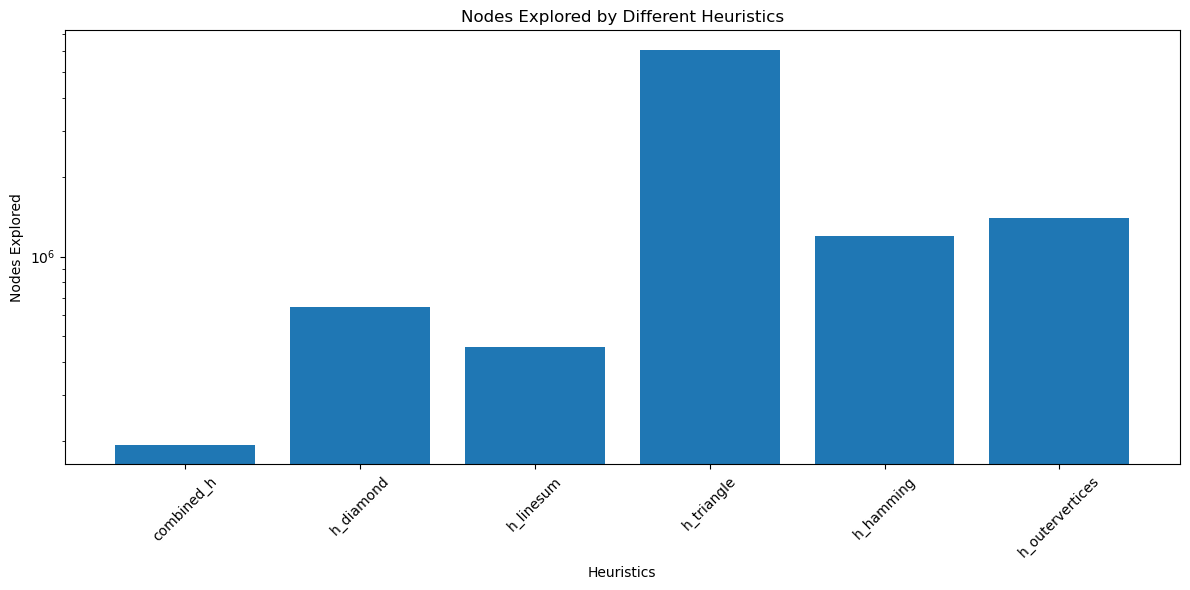

In [4]:
# ##### Task 4: Analysis of Search Algorithms for the Hexagram Puzzle

# In this task, we compare three uninformed search methods—Breadth-First Search (BFS), Depth-First Search (DFS), and Uniform-Cost Search (UCS)—against several A*-based heuristic approaches designed for solving the Hexagram Puzzle. Our goal is to analyze the performance of these algorithms, particularly focusing on the effectiveness of various heuristic functions.

# ##### Uniform Search Results

bfs_nodes = 9_899_789
dfs_nodes = 7_030_231
ucs_nodes = 10_852_484

print(f"BFS explored {bfs_nodes:,} nodes.")
print(f"DFS explored {dfs_nodes:,} nodes.")
print(f"UCS examined {ucs_nodes:,} nodes.")



# ##### Heuristic-Based Search Results

heuristic_results = {
    "combined_h": 194_033,
    "h_diamond": 646_272,
    "h_linesum": 454_202,
    "h_triangle": 6_061_652,
    "h_hamming": 1_194_391,
    "h_outervertices": 1_401_860
}

for heuristic, nodes in heuristic_results.items():
    print(f"The {heuristic} heuristic explored {nodes:,} nodes.")

# ##### Performance Comparison

optimal_cost = 30
print(f"\nAll methods maintained an optimal solution cost of {optimal_cost}, showcasing their ability to find efficient paths.")

print("The heuristic-based approaches significantly reduced the search space compared to uninformed methods:")

for heuristic, nodes in heuristic_results.items():
    percentage = (nodes / ucs_nodes) * 100
    print(f"The {heuristic} heuristic explored {percentage:.2f}% of UCS nodes.")

# Visualization of results
import matplotlib.pyplot as plt

heuristics = list(heuristic_results.keys())
nodes_explored = list(heuristic_results.values())

plt.figure(figsize=(12, 6))
plt.bar(heuristics, nodes_explored)
plt.title('Nodes Explored by Different Heuristics')
plt.xlabel('Heuristics')
plt.ylabel('Nodes Explored')
plt.yscale('log')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Task 4: Analysis of Search Algorithms for the Hexagram Puzzle

As I compared the  three uninformed search methods—**BFS**, **DFS**, and **UCS**—against several **A*-based heuristic approaches** designed for solving the Hexagram Puzzle. The goal is to analyze the performance of these algorithms:

##### Uniform Search Results

- **BFS** explored **9,899,789** nodes.
- **DFS** explored **7,030,231** nodes.
- **UCS** examined **10,852,484** nodes.

The uniform search methods, though **optimal** (UCS) or **complete** (BFS), suffer from extensive search spaces. **DFS**, while exploring fewer nodes, is not guaranteed to find the shortest path.

##### Heuristic-Based Search Results

- The **combined_h** heuristic was the most effective, exploring only **194,033** nodes.
- The **h_diamond** heuristic examined **646,272** nodes.
- The **h_linesum** heuristic explored **454,202** nodes.
- The **h_triangle** heuristic explored **6,061,652** nodes.
- The **h_hamming** heuristic examined **1,194,391** nodes.
- The **h_outervertices** heuristic required **1,401,860** nodes.

##### Performance Comparison

All methods maintained an **optimal solution cost of 30**, showcasing their ability to find efficient paths. The heuristic-based approaches significantly reduced the search space compared to uninformed methods:

- The **combined_h** heuristic was the most efficient, exploring only **1.79%** of the nodes compared to UCS. It showed consistent performance across different puzzle states.
- The **h_diamond** heuristic was the second-best, exploring **5.95%** of UCS nodes. It performed particularly well in later stages of the puzzle.
- The **h_linesum** heuristic was surprisingly effective, exploring only **4.19%** of UCS nodes. It showed strong performance in middle stages.
- The **h_hamming** heuristic explored **11.01%** of UCS nodes, performing better than some geometry-based heuristics.
- The **h_outervertices** and **h_triangle** heuristics were less effective, exploring **12.92%** and **55.85%** of UCS nodes respectively. However, they still outperformed uninformed methods.


The results highlight how blending different problem aspects can create powerful heuristics. While the **combined_h** heuristic performed well by incorporating various geometric features, it's interesting that simpler approaches like **h_diamond** and **h_linesum** were also highly effective for this puzzle. Their strong showing proves that sometimes a straightforward but well-chosen heuristic can do the job just as well as more complex ones.

Using these heuristics to guide the search led to quicker solve times and less computational overhead. In practical terms, this means **A* search** paired with **combined_h**, **h_diamond**, or **h_linesum** is likely your best bet for cracking the Hexagram Puzzle efficiently. These methods strike a nice balance - they're relatively simple to implement but still pack a punch when it comes to search performance.